# Objective: 
To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank. 

## 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
## 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np  # importing numpy for performing numeric array related operations
import matplotlib.pyplot as plt # importing matplotlib.pyplot for basic plotting operations
import seaborn as sns  # importing seaborn for advanced data visualization
sns.set(color_codes=True)



In [2]:
# read excel file
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
# shape of the data
df.shape

(660, 7)

In [4]:
# info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
# Here we find the number of unique values
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [6]:
# identify NAN values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# identify duplicated rows
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

we drop the columns that are index or customer ID

In [9]:
df.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

In [10]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


data are in different scale and they need to be standardized. 

KDE plot for all the features to see how many of it can show separate clusters


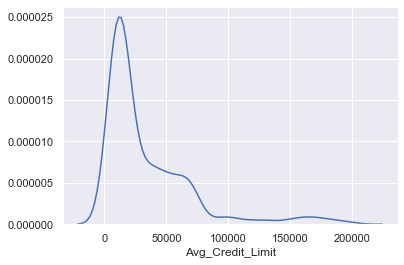

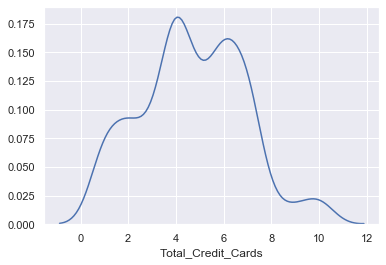

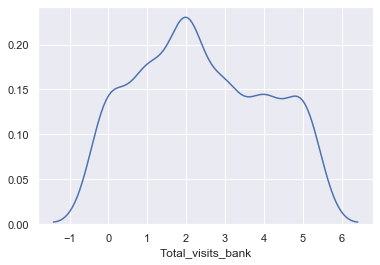

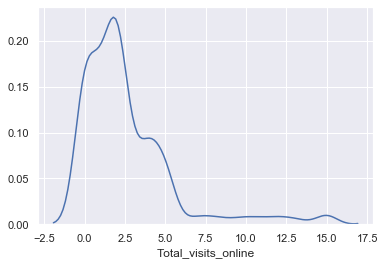

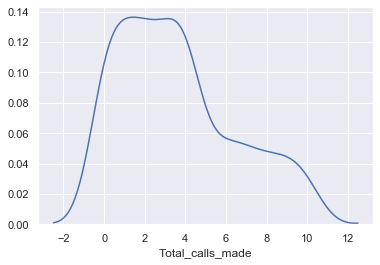

In [11]:
# univariate Analyss 
for i in df.columns:
    sns.distplot(df[i],hist=False)
    plt.show()

It looks there two clusters in some of columns such as customer key. Other columns show even more clustered with more number of peaks in the data such as total credit cards and total call made.

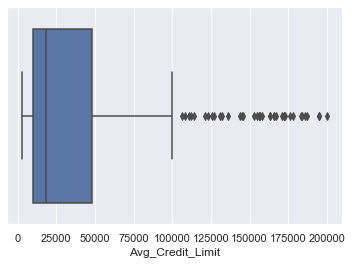

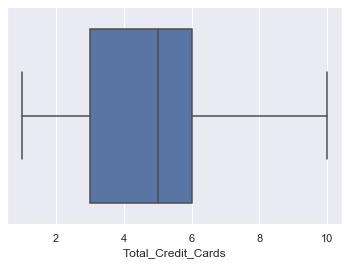

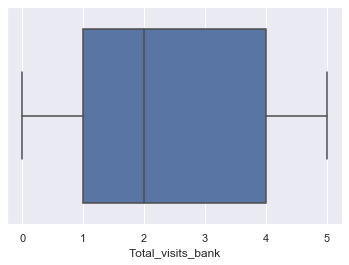

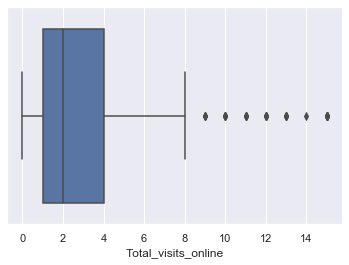

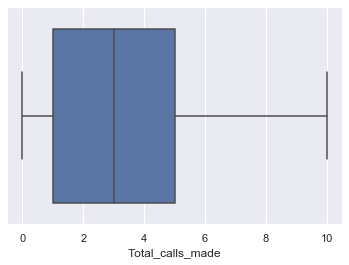

In [12]:
# Let us check presence of outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()


We keep large values for the analysis . It is shown the median of total credit card is 5 or the med of totall calls made is 3. 

In [13]:
# let us remove the outliers
#for column in df.columns.tolist():
#    Q1 = df[column].quantile(.25) # 1st quartile
#    Q3 = df[column].quantile(.75) # 3rd quartile
#    IQR = Q3-Q1 # get inter quartile range
    # Replace elements of columns that fall below Q1-1.5*IQR and above Q3+1.5*IQR
#    df[column].replace(df.loc[(df[column] > Q3+1.5*IQR)|(df[column] < Q1-1.5*IQR), column], df[column].median(),inplace=True)

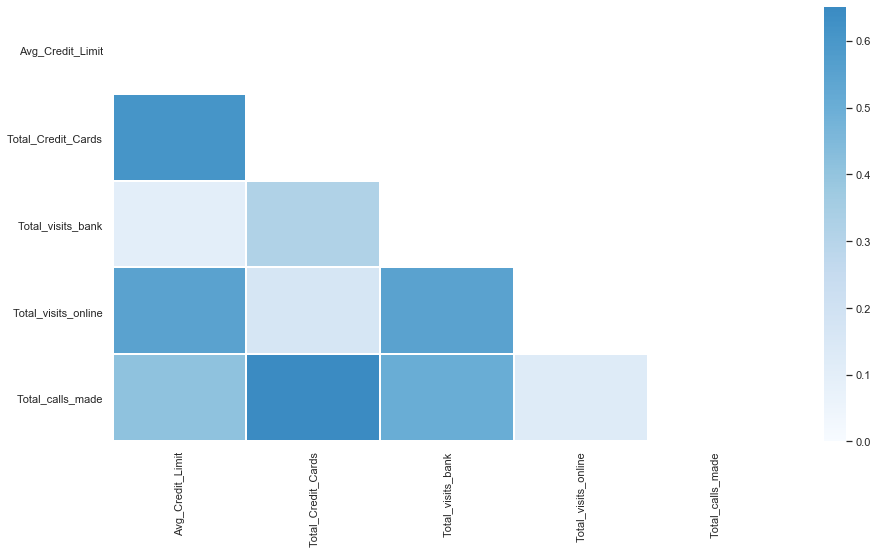

In [14]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= False, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 90)   # Aesthetic purposes
plt.yticks(rotation = 0)   # Aesthetic purposes
plt.show()

In [15]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so.head(10)

correlation
Total_calls_made    Total_Credit_Cards     0.651251
Avg_Credit_Limit    Total_Credit_Cards     0.608860
Total_visits_online Total_visits_bank      0.551861
                    Avg_Credit_Limit       0.551385
Total_calls_made    Total_visits_bank      0.506016
Avg_Credit_Limit    Total_calls_made       0.414352
Total_Credit_Cards  Total_visits_bank      0.315796

There is high correlation between Total credit card and Total calls made. Also customers with total credit cards seem to have higher avg credit limit. 

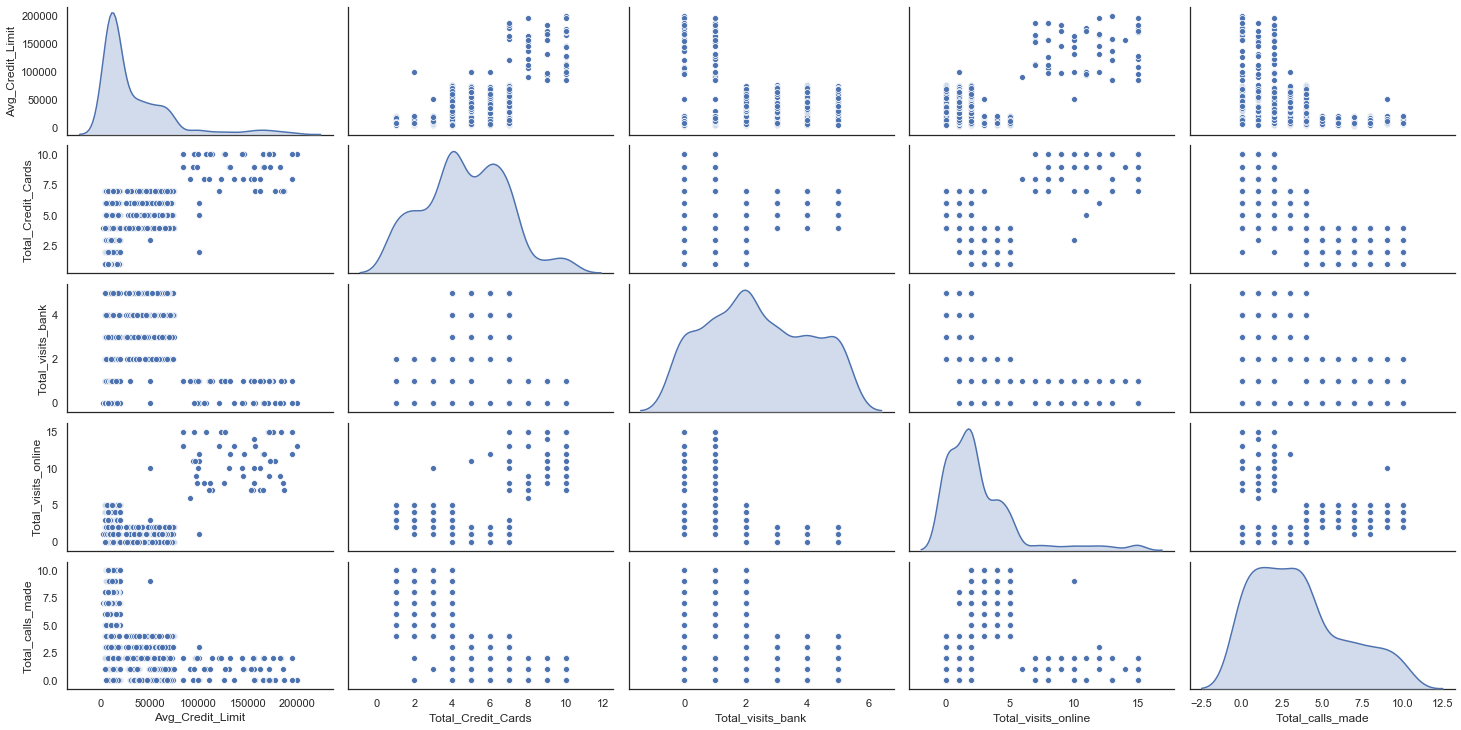

In [16]:
sns.pairplot(df,height=2,aspect=2 , diag_kind='kde')

There is higher reverse correlation between Total credit card and Total calls made. Also customers with total credit cards seem to have higher avg credit limit. The middle distributions with multiple peaks describes different number of clusteres that are presented in the data. 

## 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

### Clustering:
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). We try two main clustering algorithm to check if clusters in data are available. 
### K-means clustering
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

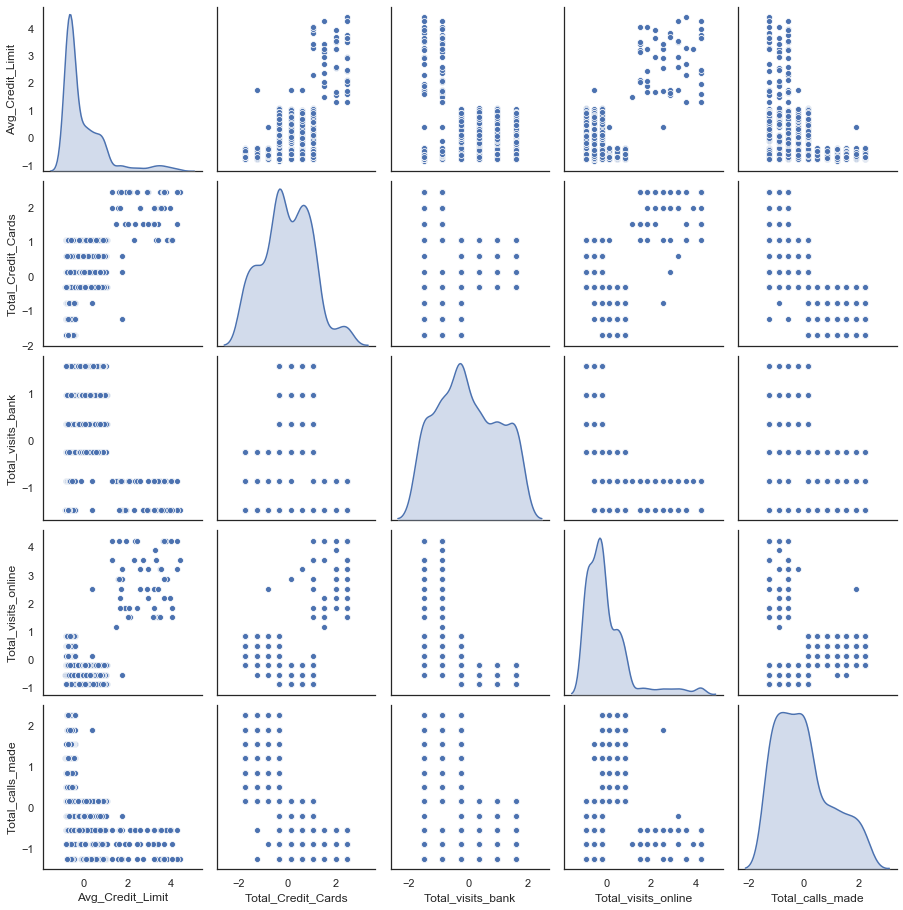

In [17]:
from scipy.stats import zscore # zscore normalization from scipy.stats

df_kmeans=df.copy()
df_kmeans_z=df_kmeans.apply(zscore)
sns.pairplot(df_kmeans_z,diag_kind='kde')

as previous pairplot conclusion we see some clusters in the data foreaxmple Total credit cards show multiple peaks

### Group Data into similar clusters
Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

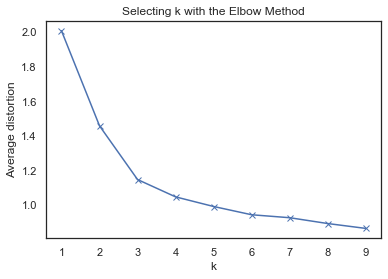

In [18]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(1,10)
meanDistortions=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_kmeans_z)
    prediction=model.predict(df_kmeans_z)
    meanDistortions.append(sum(np.min(cdist(df_kmeans_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_kmeans_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

The suiatable number of clusters can be 4 which is after the sharp slope. We also consider silhouette score to check it .

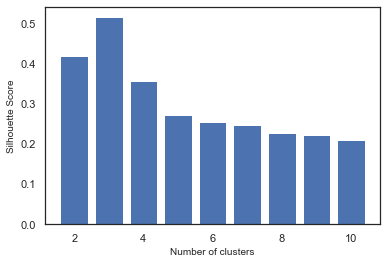

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_kmeans_z, KMeans(n_clusters = n_cluster).fit_predict(df_kmeans_z))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

We start with 4 number of clusters considering elbow and Silhoutte score

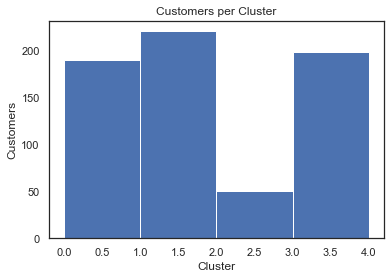

In [20]:
# Let us first start with K = 4

n_clusters = 4

kmeans_model = KMeans(n_clusters=n_clusters,random_state=0)
kmeans_model.fit(df_kmeans_z)
kmeans_prediction=kmeans_model.predict(df_kmeans_z)

# plot cluster sizes

plt.hist(kmeans_prediction, bins=range(n_clusters+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

The size of cluster 2 is the bigget and cluster 3 is the smallest.

In [21]:
#Append the prediction to original dataframes
df_kmeans["GROUP"] = kmeans_prediction
df_kmeans_z["GROUP"] = kmeans_prediction
print("Groups Assigned : \n")
df_kmeans.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2


It is showing forexample first row is  in cluster 3 and so on...

In [22]:
# How the mean of df look lik after grouping
df_kmeansClust = df_kmeans.groupby(['GROUP'])
df_kmeansClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,35904.522613,5.522613,2.477387,0.969849,2.075377


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6C5699C08>,
      dtype=object)

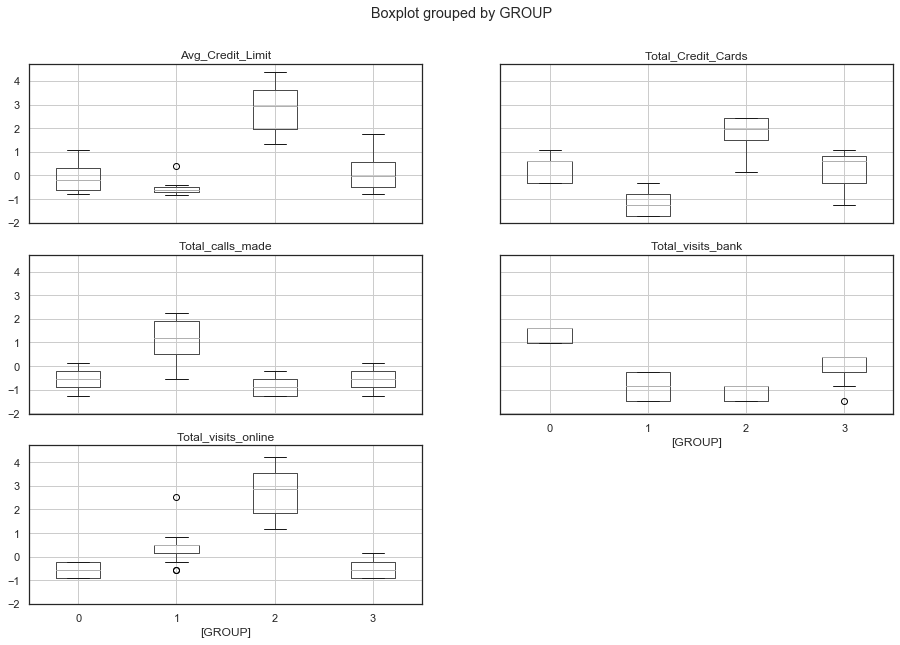

In [23]:
df_kmeans_z.boxplot(by='GROUP', figsize=(15,10))


It is shown cluster 0 and 4 are very similar. therefore optimum number of clusters can be 3. 

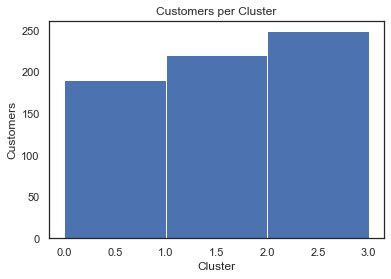

In [24]:
# Let us first start with K = 3

n_clusters = 3

kmeans_model = KMeans(n_clusters=n_clusters,random_state=0)
kmeans_model.fit(df_kmeans_z)
kmeans_prediction=kmeans_model.predict(df_kmeans_z)

# plot cluster sizes

plt.hist(kmeans_prediction, bins=range(n_clusters+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

In [25]:
#Append the prediction to original dataframes
df_kmeans["GROUP"] = kmeans_prediction
df_kmeans_z["GROUP"] = kmeans_prediction
print("Groups Assigned : \n")
df_kmeans.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,2
1,50000,3,0,10,9,1
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,2


In [26]:
# How the mean of df look lik after grouping
df_kmeansClust = df_kmeans.groupby(['GROUP'])
df_kmeansClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,57016.064257,6.168675,2.100402,2.963855,1.875502


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6C6CB4948>,
      dtype=object)

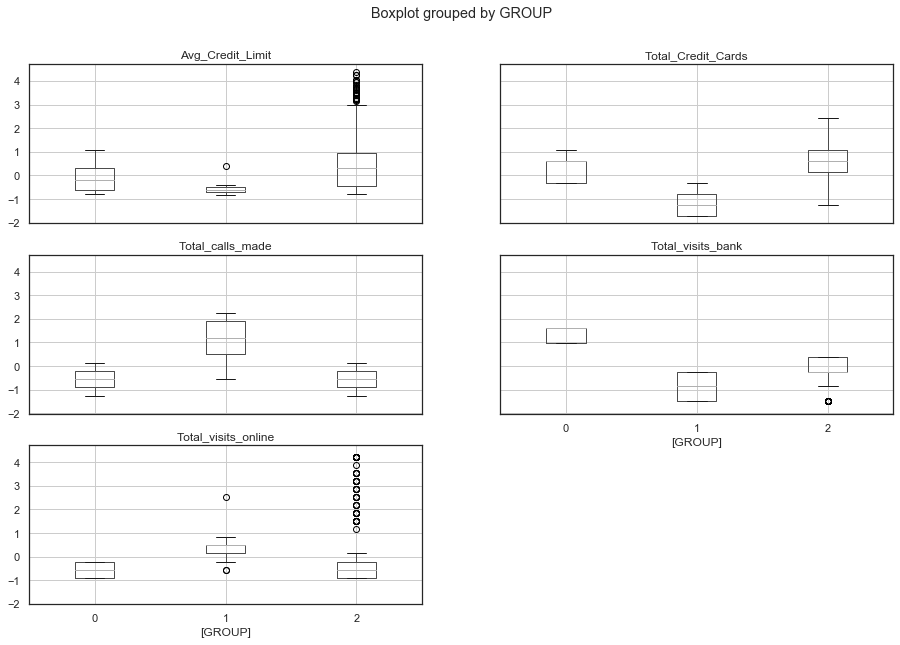

In [27]:
df_kmeans_z.boxplot(by='GROUP', figsize=(15,10))


In group group 3 avg credit card and total number of cluster is highest. The group is high in total visit online. 
The first group 1 is second high in avg credit card and total number of cards. But they have highest bank visit like 2 times the third group. These two groups have similar number of calls made. 
So in group1 and group 3, the main difference is in online visit or bank visit. 
Group2 with lowest avg credit card and minimum number of total credit cards, they have minimum bank visit. But the online visit and calls made for inquiry are highest in second group. 


## 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)


In [28]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 


df_hier=df.copy()
df_hier_z=df_hier.apply(zscore)


all data are standardized so it means they are in same scale with mean 0 and std of 1

we try to group data in different clusters . First we need to find the linkage matrix which means how data are clustered based on the distance matrix. 

In [29]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
from scipy.cluster.hierarchy import dendrogram, linkage


Z = linkage(df_hier_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_hier_z))
c

0.8977080867389372

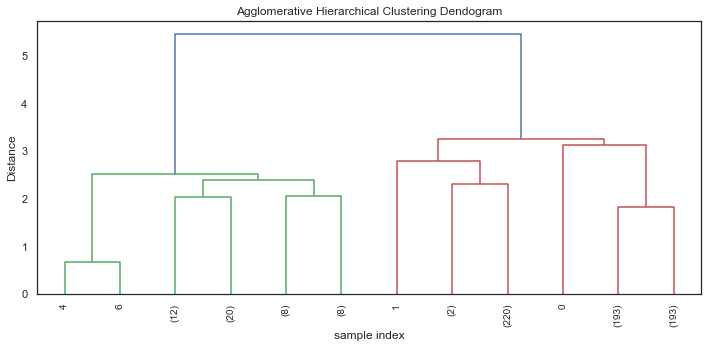

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=4,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [31]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_hier_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_hier_z))

c

0.8599730607972423

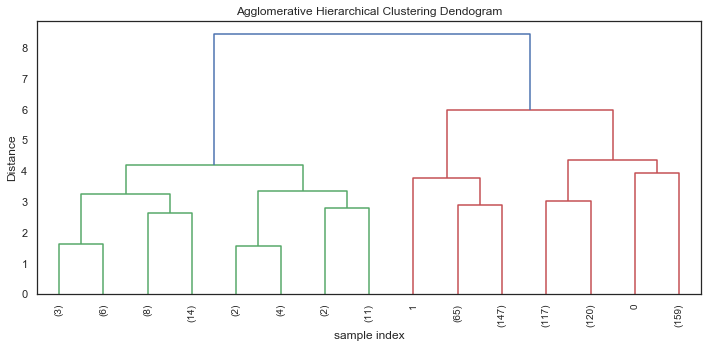

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=7,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [33]:
Z = linkage(df_hier_z, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_hier_z))

c

0.7415156284827493

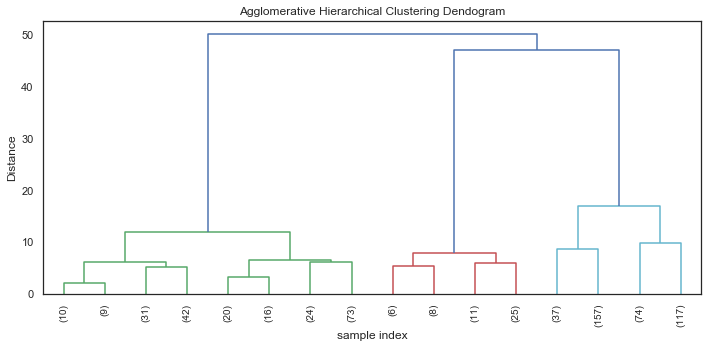

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=30,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

Based on cophenic coef we can see euclidean with average linkege looks the best choice. we also check siliuette score. 

In [35]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_hier_z)
        sil_score = silhouette_score(df_hier_z, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )    
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])
df_hierarchical.sort_values('sil_score', ascending=False)


,cluster,sil_score,linkage_method,number_of_clusters
2,2,0.570318,complete,2
1,2,0.570318,average,2
4,4,0.474951,average,4
0,2,0.417704,ward,2
7,6,0.415355,average,6
3,4,0.348082,ward,4
13,10,0.345509,average,10
10,8,0.343067,average,8
5,4,0.305271,complete,4
8,6,0.277381,complete,6


average linkage method with 2 number of clusters has good sinsieutte score. we start with 2 clusters . But first w etry 3.

In [36]:
from sklearn.cluster import AgglomerativeClustering 


model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(df_hier_z)

#Append the prediction 
df_hier['labels'] = model.labels_
df_hier_z['labels'] = model.labels_
print("Groups Assigned : \n")
df_hier.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


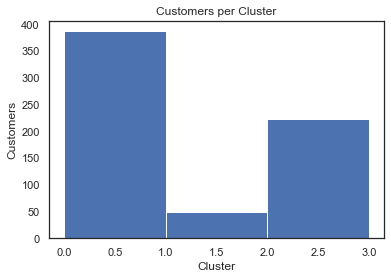

In [37]:
# plot cluster sizes

plt.hist(df_hier['labels'], bins=range(n_clusters+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

cluster 2 looks very small

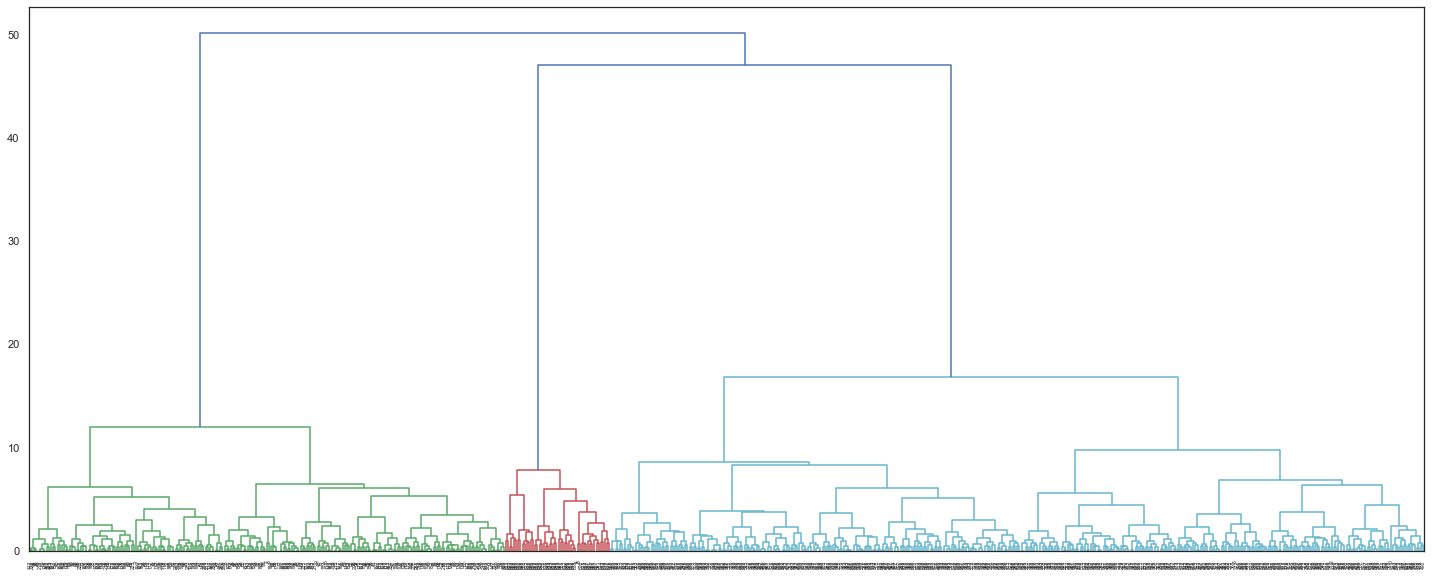

In [38]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [39]:
# How the mean of df look lik after grouping
df_hierClust = df_hier.groupby(['labels'])
df_hierClust.mean()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6C7444C88>,
      dtype=object)

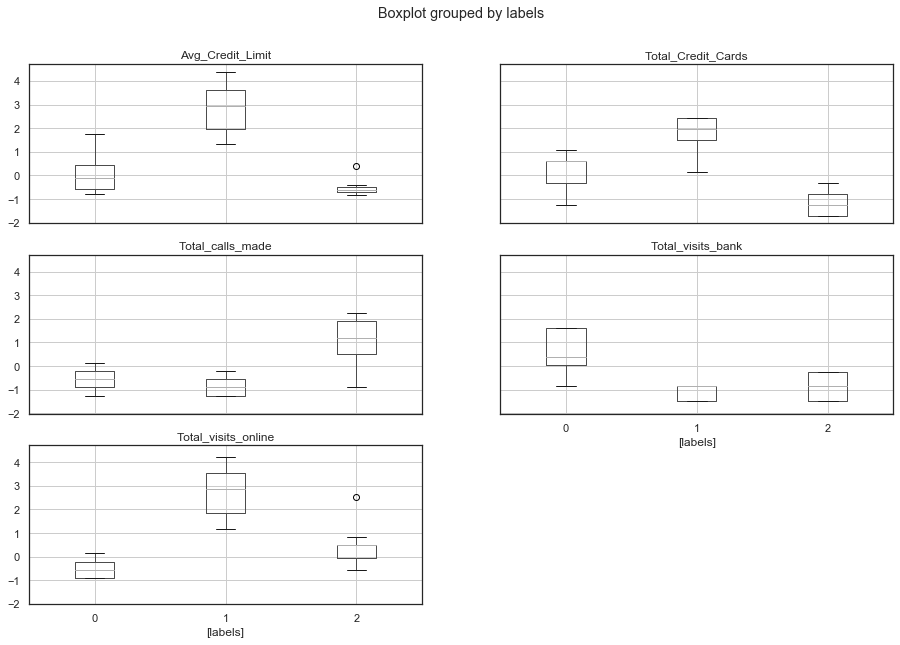

In [40]:
df_hier_z.boxplot(by='labels', figsize=(15,10))


The boxplots are explaining that the second group with high average credit card and total number of credit cards has lowest bank visit and call made, but high in online visits. 
The third group is second high in avg credit cards and number of cards, but they have more bank visit rather than online visit. The first group has less number of credit cards and avg credit and they are inquired mostly by phone calls. 

Silhouette Score is better when closer 1 and worse when closer to -1



# 5. Calculate average silhouette score for both methods. (5 marks)

In [41]:
# Calculate Avg Silhoutte Score for Hierarchical Clustering with number of clusters 3

agglomerative = AgglomerativeClustering(linkage='average', affinity='euclidean',n_clusters=3).fit_predict(df_hier_z)
sil_score_hier = silhouette_score(df_hier_z, agglomerative, metric='euclidean')
sil_score_hier

0.590990473596407

In [42]:
# Calculate Avg Silhoutte Score for k-means Clustering with number of clusters 3
sil_score_kmeans=silhouette_score(df_kmeans_z, KMeans(n_clusters = 3).fit_predict(df_kmeans_z))
sil_score_kmeans


0.46115259186022617

# 6. Compare K-means clusters with Hierarchical clusters. (5 marks)

Both analysis appliied same clustering concpets. for example devision of customers with higher avg credit and credit cards to two different groups with high bank visits and high online visits. and also the third group with low avg credit card and number of cards with higher calls made. However, Hierarchical clustering has a better sil_score and shows a better distincts clustering between customers since the mean of the groups and boxplots can be more differentiated. 

## kmeans

<Figure size 1800x1800 with 0 Axes>

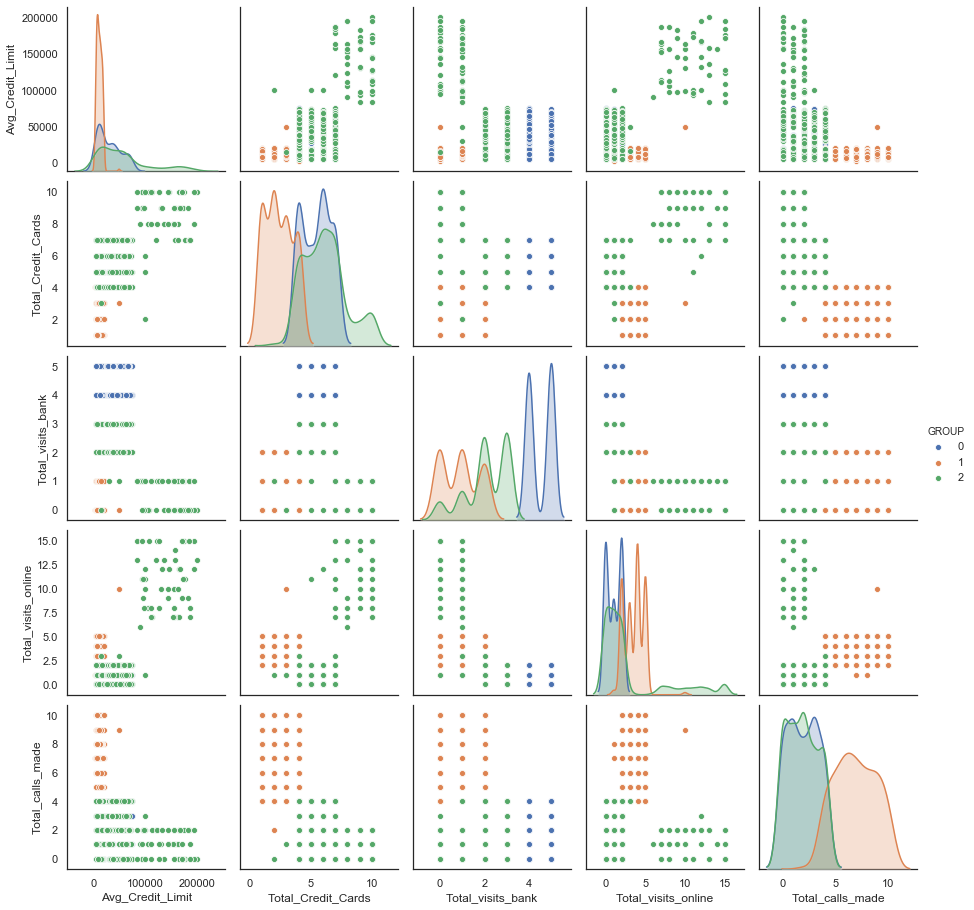

In [43]:
best_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']

best_columns.append("GROUP")
plt.figure(figsize=(25,25))
sns.pairplot( df_kmeans[best_columns], hue="GROUP")

# Hierarchical

<Figure size 1800x1800 with 0 Axes>

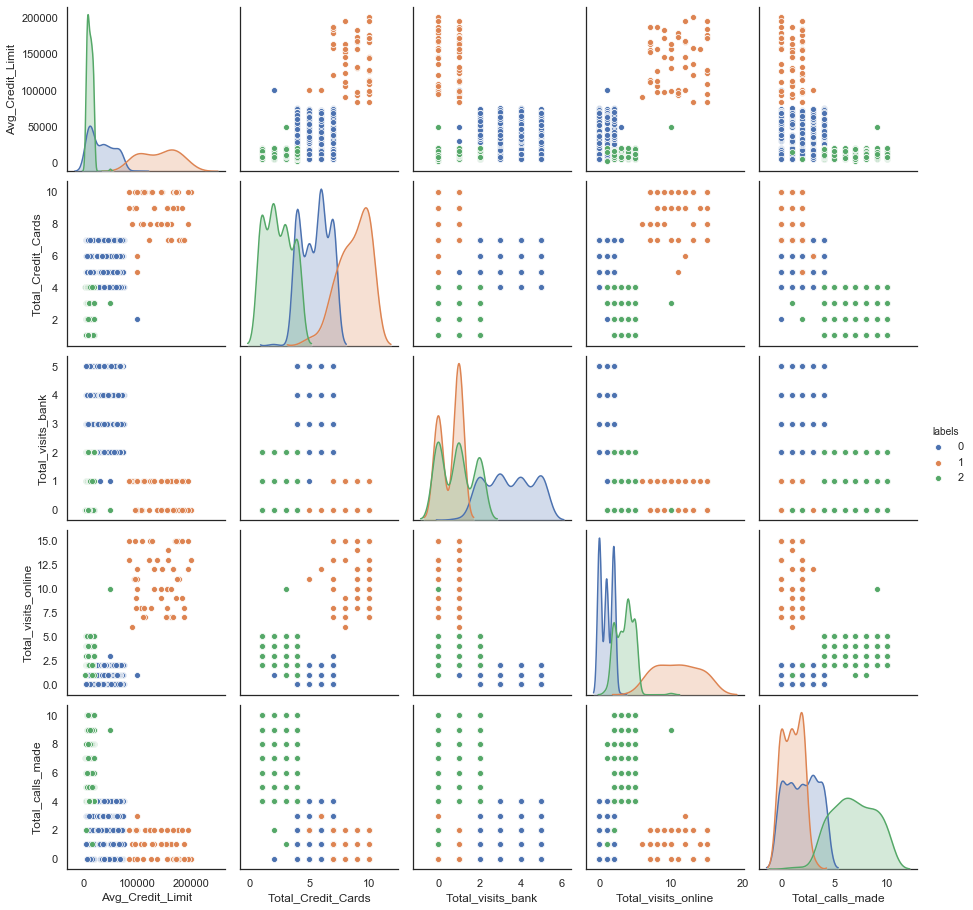

In [44]:
best_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']

best_columns.append("labels")
plt.figure(figsize=(25,25))
sns.pairplot( df_hier[best_columns], hue="labels")

# 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

The comments are added in boxplots. In general 3 different clusters are distinguished according to the above graphs. 
1. Group A: customers who made more online visits are the ones have highest avg credit card and number of cards
2. Group B: Customers who made more bank visits are the ones with second high avg credit card and number of cards. 
3. Group C: Customers who enquires by calls are the ones with lowest avg credit card and number of cards.


How many different segments of customers are there?
3 different segments are identified in the clusters. 
2. How are these segments different from each other?
They are different in avg and number of credits. Also it can be seen 3 different segments contacted the banks with different channels. As the 3 groups explained above. 
3. What are your recommendations to the bank on how to better market to and service these customers?
The recommendation is to increase the inquiries by facilitating online contact to the bank. Since the group with online contact has highest avg credit limit ,  also encouraging the customers with lowest avg credit limit to contact via online enquiries.
